In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [26]:
# 生成测试数据的函数
def generate_test_data(filepath):
    degree = 8
    ploy_reg = PolynomialFeatures(degree)
    x_data = np.array(list(range(1, 11)))
    x_ploy = ploy_reg.fit_transform(x_data[:,np.newaxis])
    coefs = np.random.uniform(0, 1, degree + 1)
    coefs[0] = 1
    y_data = np.sum(x_ploy * coefs, axis=1)
    # 打印一个 np.row_stack((x_data, y_data))， 就知道为什么要取转置
    test_data = np.row_stack((x_data, y_data)).T
    np.savetxt(filepath, test_data, delimiter=',')

generate_test_data('./regression/polynomial-data.csv')

[[1.00000000e+00 6.10101760e+00]
 [2.00000000e+00 3.99217369e+02]
 [3.00000000e+00 8.32865771e+03]
 [4.00000000e+00 7.67249555e+04]
 [5.00000000e+00 4.37958240e+05]
 [6.00000000e+00 1.83335617e+06]
 [7.00000000e+00 6.17924669e+06]
 [8.00000000e+00 1.77496350e+07]
 [9.00000000e+00 4.50950690e+07]
 [1.00000000e+01 1.03956693e+08]]


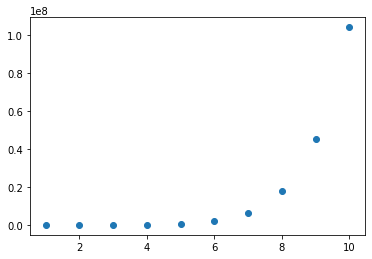

In [30]:
data = np.loadtxt('./regression/polynomial-data.csv', delimiter=',')
print(data)
plt.scatter(data[:,0], data[:,1])
plt.show()

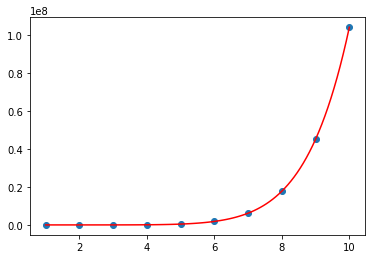

[[0.00000000e+00 6.15460018e-01 5.62434044e-01 9.14899415e-01
  4.82443127e-01 9.01255876e-02 9.40197697e-01 5.17162699e-01
  9.78300532e-01 4.73088933e-12]]
[0.99999446]


In [61]:
# 取所有的行，分别取第 0 列与第 1 列
# 同时增加一个维度
x_data = data[:,0,np.newaxis]
y_data = data[:,1,np.newaxis]

# 进行特征处理
# 主要是将未知数 x 转换成 [x^0  x^1  x^2  ...]
ploy_reg = PolynomialFeatures(degree=9)
x_ploy = ploy_reg.fit_transform(x_data)

lin_reg = LinearRegression()
lin_reg.fit(x_ploy, y_data)

plt.scatter(x_data, y_data)
# print(x_data)

# 生成用于测试的点
# 在 1 到 10 闭区间上均匀生成 100 个值
# 并增加一个维度
test_data = np.linspace(1, 10, 100)[:,np.newaxis]
# print(test_data)
plt.plot(test_data, lin_reg.predict(ploy_reg.fit_transform(test_data)), color='r')
plt.show()

# 系数值
print(lin_reg.coef_)
# 偏置项
print(lin_reg.intercept_)